# 图像细化（骨架提取）

图像的细化主要是针对二值图而言

所谓骨架，可以理解为图像的中轴，，一个长方形的骨架，是它的长方向上的中轴线，

圆的骨架是它的圆心，直线的骨架是它自身，孤立点的骨架也是自身。

骨架的获取主要有两种方法：

（1）基于烈火模拟

设想在同一时刻，将目标的边缘线都点燃，火的前沿以匀速向内部蔓延，当前沿相交时火焰熄灭，

火焰熄灭点的结合就是骨架。

（2）基于最大圆盘

目标的骨架是由目标内所有内切圆盘的圆心组成
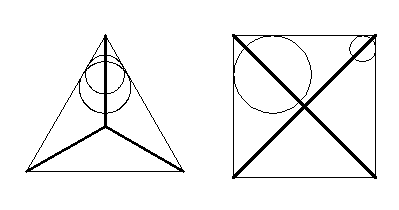

我们来看看典型的图形的骨架（用粗线表示）

细化的算法有很多种，但比较常用的算法是查表法

细化是从原来的图中去掉一些点，但仍要保持原来的形状。

实际上是保持原图的骨架。

判断一个点是否能去掉是以8个相邻点（八连通）的情况来作为判据的，具体判据为：

1，内部点不能删除

2，鼓励点不能删除

3，直线端点不能删除

4，如果P是边界点，去掉P后，如果连通分量不增加，则P可删除
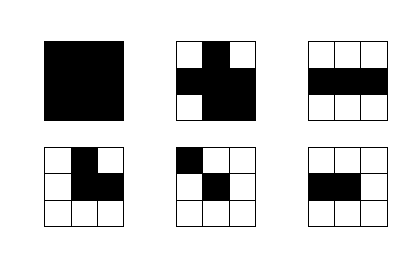

看看上面那些点。

第一个点不能去除，因为它是内部点

第二个点不能去除，它也是内部点

第三个点不能去除，删除后会使原来相连的部分断开

第四个点可以去除，这个点不是骨架

第五个点不可以去除，它是直线的端点

第六个点不可以去除，它是直线的端点

 

对于所有的这样的点，我们可以做出一张表，来判断这样的点能不能删除
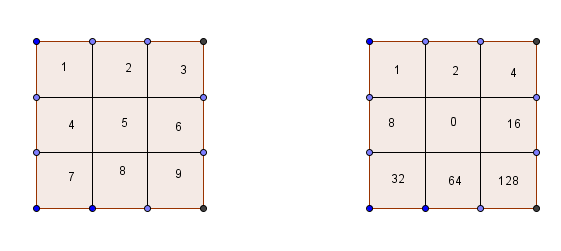

我们对于黑色的像素点，对于它周围的8个点，我们赋予不同的价值，

若周围某黑色，我们认为其价值为0，为白色则取九宫格中对应的价值

对于前面那幅图中第一个点，也就是内部点，它周围的点都是黑色，所以他的总价值是0，对应于索引表的第一项

前面那幅图中第二点，它周围有三个白色点，它的总价值为1+4+32=37，对应于索引表中第三十八项

我们用这种方法，把所有点的情况映射到0～255的索引表中

 

我们扫描原图，对于黑色的像素点，根据周围八点的情况计算它的价值，然后查看索引表中对应项来决定是否要保留这一点

 
参考：

[1]. http://www.cnblogs.com/xianglan/archive/2011/01/01/1923779.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import imageio
import numpy as np

In [13]:
src = imageio.imread('../datas/blob.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [7]:
def thin(image,array):
    h,w = image.shape[0],image.shape[1]
    dst = image.copy()
    for i in range(h):
        for j in range(w):
            if image[i,j] == 0:
                a = [1] * 9
                for k in range(3):
                    for l in range(3):
                        if -1 < (i-1+k) < h and -1 < (j-1+l) < w and dst[i-1+k,j-1+l] == 0:
                            a[k*3+l] = 0
                sum_val = a[0] * 1 + a[1] * 2 + a[2] * 4 + a[3] * 8 + \
                          a[5] * 16 + a[6] * 32 + a[7] * 64 +a[8] * 128
                dst[i,j] = array[sum_val] * 255
    return dst

In [23]:
bin_img = np.zeros_like(gray)
bin_img[gray < 80] = 0
bin_img[gray >= 80] = 255

In [24]:
array = [0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,
         1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,
         0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,
         1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,
         1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
         1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,
         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
         0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,
         1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,
         0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,
         1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,
         1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,
         1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,
         1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,0,
         1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0]

In [25]:
dst = thin(bin_img,array)

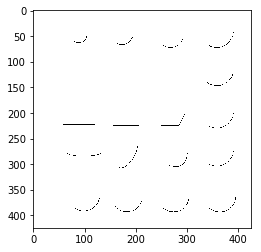

In [26]:
plt.imshow(dst,'gray')

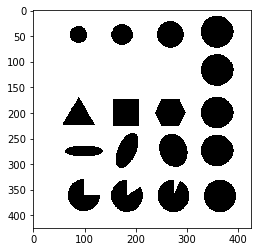

In [27]:
plt.imshow(bin_img,'gray')